# Classification of heart attack risk

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
heart_df = pd.read_csv('data/heart.csv')

# Exploratory analysis & visualization

In [20]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [54]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [22]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


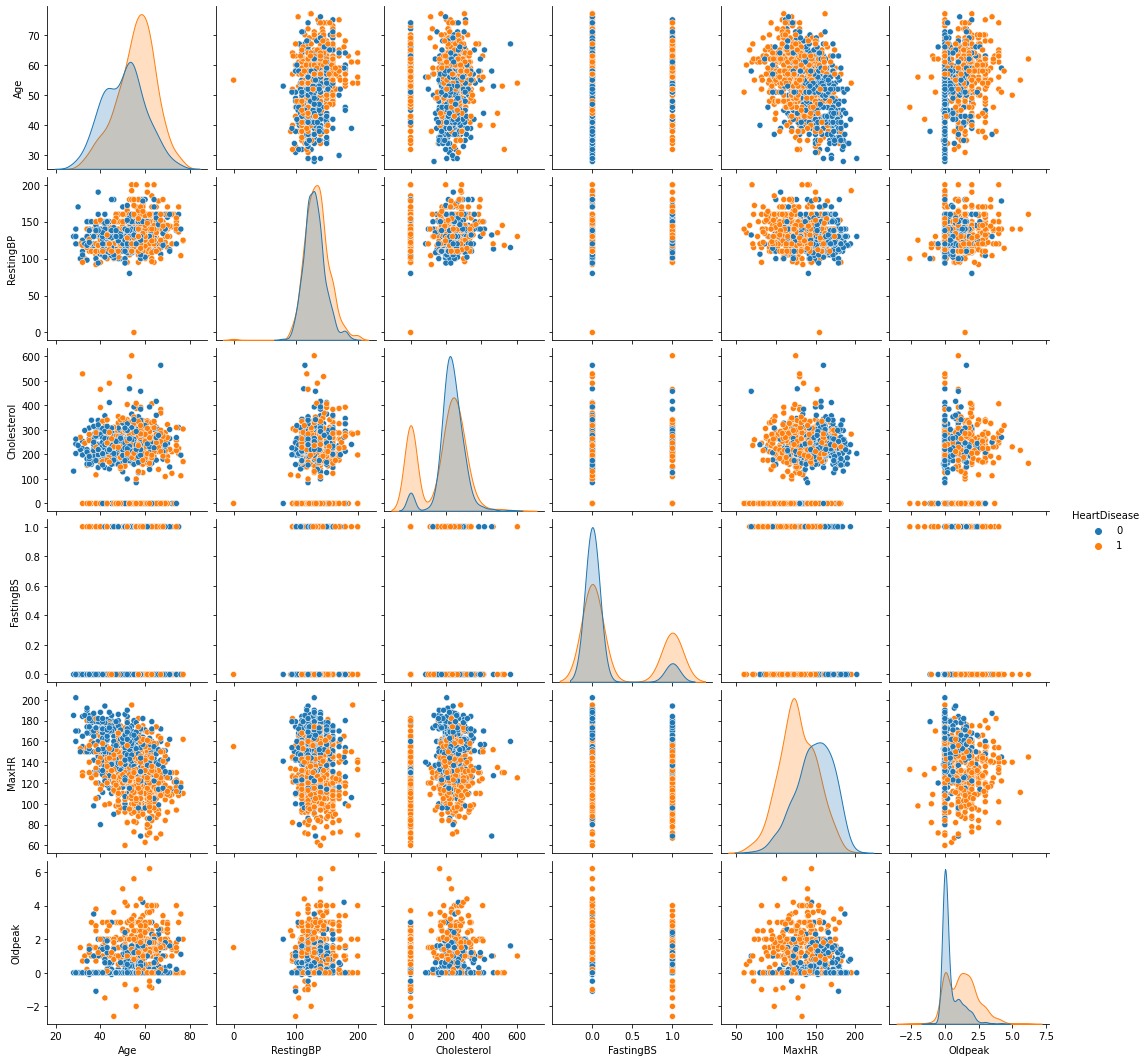

In [35]:
sns.pairplot(data=heart_df, hue='HeartDisease')

<AxesSubplot:>

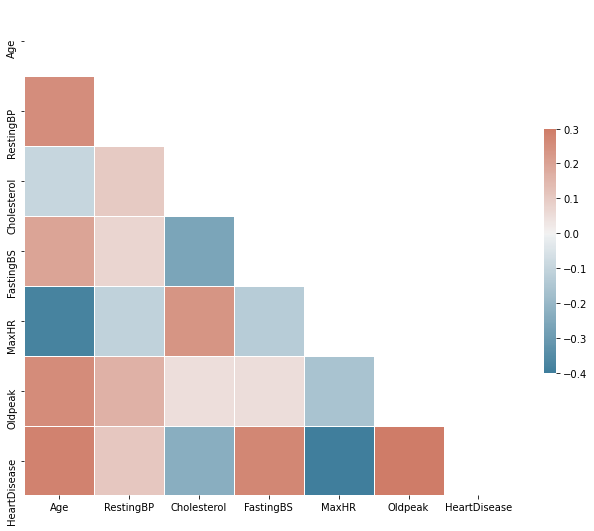

In [24]:
# Compute the correlation matrix
corr = heart_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Heart diseas has negative correlation with Cholesterol (sort of) and MaxHR

Positive correlation with Age, Resting BP, Fasting BS, Oldpeak

## Look at just the categorical variables first

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

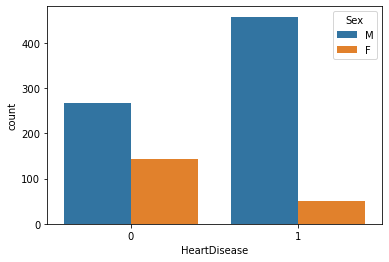

In [29]:
sns.countplot(data=heart_df, x='HeartDisease', hue='Sex')

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

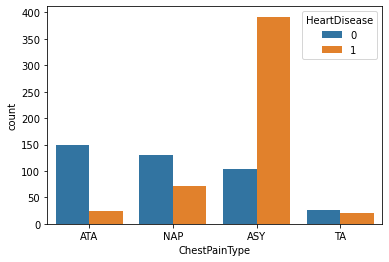

In [32]:
sns.countplot(data=heart_df, x='ChestPainType', hue='HeartDisease')

<AxesSubplot:xlabel='Sex', ylabel='count'>

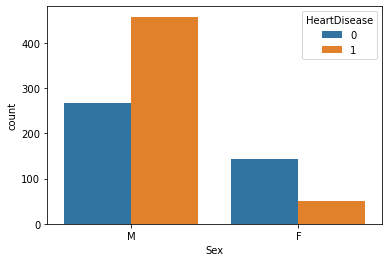

In [33]:
sns.countplot(data=heart_df, x='Sex', hue='HeartDisease')

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

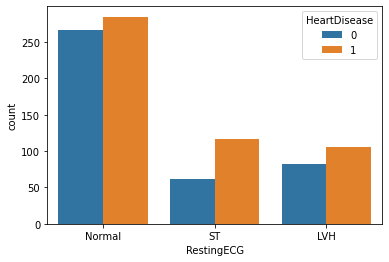

In [34]:
sns.countplot(data=heart_df, x='RestingECG', hue='HeartDisease')

## Linearity of variables (distribution graphs)

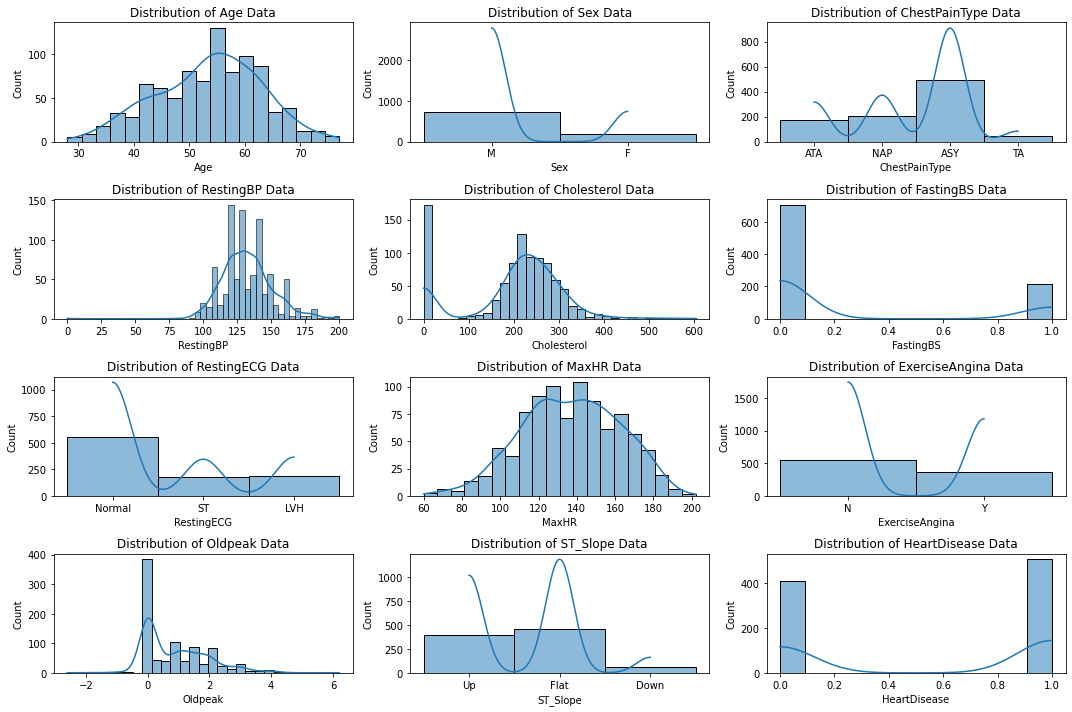

In [37]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart_df[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Numerical variables

In [38]:
# age, restingbp, cholesterol, oldpeak, maxhr

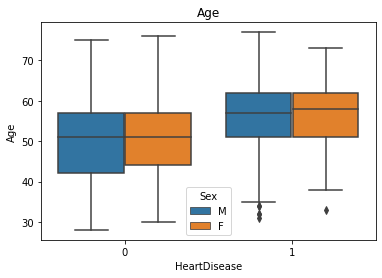

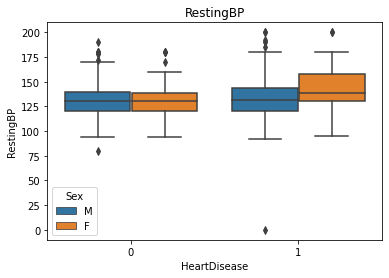

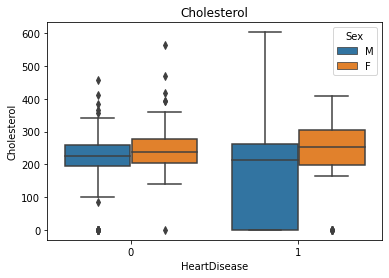

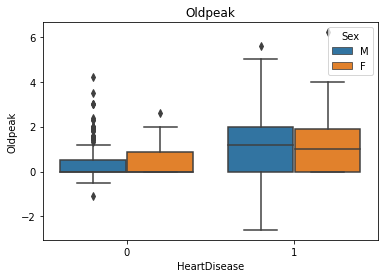

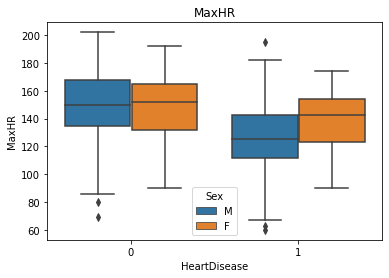

In [40]:
for column in ['Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=heart_df, x='HeartDisease', y=column, hue='Sex')
    plt.title(column)

# Data preprocessing

1. Null values
- Can either remove the rows with null values or impute


In [41]:
# check for null values in the data
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

2. Feature scaling
- Distance based algorithms such as KNN and SVM are affected by unscaled features which will cause imbalanced weights to be attributed to features with larger values
- Normalization - Good when you know distribution of data doesnt follow Gaussian distribution (bounded to be between 0 and 1)
- Standardization good when data follows a Gaussian distribution (no bounding range unlike normalization)

- Use robust scaler which removes the median and scales the range between 1st and 3rd quartile range so it is robust to outliers


In [42]:
from sklearn.preprocessing import RobustScaler

In [43]:
scaler = RobustScaler()

In [45]:
heart_df[['Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR']] = scaler.fit_transform(heart_df[['Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR']])

In [48]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-0.037624,0.119826,-0.258138,0.233115,-0.033073,0.191576,0.553377
std,0.725586,0.925708,1.166764,0.423046,0.707232,0.711047,0.497414
min,-2.000000,-6.500000,-2.378667,0.000000,-2.166667,-2.133333,0.000000
25%,-0.538462,-0.500000,-0.530667,0.000000,-0.500000,-0.400000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.461538,0.500000,0.469333,0.000000,0.500000,0.600000,1.000000
max,1.769231,3.500000,4.053333,1.000000,1.777778,3.733333,1.000000


3. Categorical values
- Nominal: variables with 2 or more categories that do not have any order associated with them
- Categorical: variables where the order is important

Methods to encode categorical/text data:
- One hot encoding: Good to use for non-tree based algorithms. Result is binary instead of ordinal and all data is in an orthogonal vector space. DIsadvantage is for high cardinality the feature space can get huge. One way around this is to use one hot encoding and THEN use PCA for dimensionality reduction after as the PCA finds linear overlap and will group similar features into the same PC
    - pd.get_dummies()

- Label encoding: good to use when we are using tree-based algorithms as tree algorithms can work with these values fine, also doesn't take up as much space as one hot encoding.
    - from sklearn.preprocessing import LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder

Doing both tree and non-tree based methods, so we will encode both ways

In [52]:
# Label encoding - only works for tree based methods
heart_df_tree = heart_df.apply(LabelEncoder().fit_transform)
heart_df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [59]:
# One hot encoding - works for all other methods
heart_df_nontree = pd.get_dummies(heart_df, columns=categorical_columns, drop_first=False)
heart_df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.704000,0,0.944444,-0.400000,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.384615,1.5,-0.458667,0,0.500000,0.266667,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.307692,0.0,0.640000,0,-1.111111,-0.400000,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.461538,0.4,-0.096000,0,-0.833333,0.600000,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.000000,1.0,-0.298667,0,-0.444444,-0.400000,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [60]:
X_nontree = heart_df_nontree.drop(columns='HeartDisease')
y_nontree = heart_df_nontree['HeartDisease']

# Choosing the best cross-validation

1. K-fold cross-validation
- Divide sample into k sets which are exclusive from each other

2. Stratified k-fold cross-validation
- Useful if we have skewed dataset (ie. 90% positive 10% negative samples) where we wouldn't want to use a random k-fold CV. Stratified k-fold CV keeps the ratio of labels in each fold constant (i.e. always 90% 10% as in the earlier example)

# Training model

### Logistic regression

In [56]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [73]:
acc_log = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_nontree.loc[train]
    y_train = y_nontree.loc[train]
    
    X_validation = X_nontree.loc[validation]
    y_validation = y_nontree.loc[validation]
    
    minmax_scaler = MinMaxScaler()
    X_train=minmax_scaler.fit_transform(X_train)
    X_validation=minmax_scaler.fit_transform(X_validation)
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_log.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")
    


Fold: 0
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

Accuracy for fold 0: 0.8604734576757532
Fold: 1
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.91      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy for fold 1: 0.8629842180774749
Fold: 2
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83       184
   macro avg       0.87 

### Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
acc_gaussnb = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_nontree.loc[train]
    y_train = y_nontree.loc[train]
    
    X_validation = X_nontree.loc[validation]
    y_validation = y_nontree.loc[validation]
    
    minmax_scaler = MinMaxScaler()
    X_train=minmax_scaler.fit_transform(X_train)
    X_validation=minmax_scaler.fit_transform(X_validation)
    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_gaussnb.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")

Fold: 0
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        82
           1       0.86      0.87      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy for fold 0: 0.8509086561453849
Fold: 1
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        82
           1       0.91      0.92      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

Accuracy for fold 1: 0.9059062649450023
Fold: 2
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        82
           1       0.76      1.00      0.86       102

    accuracy                           0.82       184
   macro avg       0.88 

### SVM

In [76]:
from sklearn.svm import SVC

In [82]:
# Linear kernel
acc_svm_linear = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_nontree.loc[train]
    y_train = y_nontree.loc[train]
    
    X_validation = X_nontree.loc[validation]
    y_validation = y_nontree.loc[validation]
    
    minmax_scaler = MinMaxScaler()
    X_train=minmax_scaler.fit_transform(X_train)
    X_validation=minmax_scaler.fit_transform(X_validation)
    
    clf = SVC(kernel="linear")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_svm_linear.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")

Fold: 0
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        82
           1       0.92      0.80      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy for fold 0: 0.8592778574844573
Fold: 1
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.91      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy for fold 1: 0.8629842180774749
Fold: 2
              precision    recall  f1-score   support

           0       0.97      0.70      0.81        82
           1       0.80      0.98      0.88       102

    accuracy                           0.85       184
   macro avg       0.88 

In [81]:
# Sigmoid kernel
acc_svm_sigmoid = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_nontree.loc[train]
    y_train = y_nontree.loc[train]
    
    X_validation = X_nontree.loc[validation]
    y_validation = y_nontree.loc[validation]
    
    minmax_scaler = MinMaxScaler()
    X_train=minmax_scaler.fit_transform(X_train)
    X_validation=minmax_scaler.fit_transform(X_validation)
    
    clf = SVC(kernel="sigmoid")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_svm_sigmoid.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")

Fold: 0
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy for fold 0: 0.8582018173122907
Fold: 1
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        82
           1       0.84      0.75      0.79       102

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184

Accuracy for fold 1: 0.7859875657580107
Fold: 2
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        82
           1       0.81      0.89      0.85       102

    accuracy                           0.83       184
   macro avg       0.83 

In [80]:
# RBF kernel
acc_svm_rbf = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_nontree.loc[train]
    y_train = y_nontree.loc[train]
    
    X_validation = X_nontree.loc[validation]
    y_validation = y_nontree.loc[validation]
    
    minmax_scaler = MinMaxScaler()
    X_train=minmax_scaler.fit_transform(X_train)
    X_validation=minmax_scaler.fit_transform(X_validation)
    
    clf = SVC(kernel="rbf")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_svm_rbf.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")

Fold: 0
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

Accuracy for fold 0: 0.9108082257293162
Fold: 1
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

Accuracy for fold 1: 0.8433763749402199
Fold: 2
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.79      0.93      0.86       102

    accuracy                           0.83       184
   macro avg       0.84 

### KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
acc_knn = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_nontree.loc[train]
    y_train = y_nontree.loc[train]
    
    X_validation = X_nontree.loc[validation]
    y_validation = y_nontree.loc[validation]
    
    minmax_scaler = MinMaxScaler()
    X_train=minmax_scaler.fit_transform(X_train)
    X_validation=minmax_scaler.fit_transform(X_validation)
    
    clf = KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_knn.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")

Fold: 0
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

Accuracy for fold 0: 0.9230033476805357
Fold: 1
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        82
           1       0.90      0.80      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

Accuracy for fold 1: 0.8470827355332377
Fold: 2
              precision    recall  f1-score   support

           0       0.92      0.73      0.82        82
           1       0.82      0.95      0.88       102

    accuracy                           0.85       184
   macro avg       0.87 

## Performance of non-tree algorithms

In [86]:
non_tree_performance_df = pd.DataFrame()
algorithm_accuracy_lists = [acc_log, acc_gaussnb, acc_svm_linear, acc_svm_sigmoid, acc_svm_rbf, acc_knn]
algorithm_list = ['LogisticRegression', 'GaussianNB', 'LinearSVM', 'SigmoidSVM', 'RBFSVM', 'KNN']
for acc_list, algorithm in zip(algorithm_accuracy_lists, algorithm_list):
    tmp_df = pd.DataFrame()
    tmp_df['Accuracy'] = acc_list
    tmp_df['Algorithm'] = algorithm
    non_tree_performance_df = non_tree_performance_df.append(tmp_df, ignore_index=True)

Text(0.5, 1.0, 'Nontree algorithm accuracy')

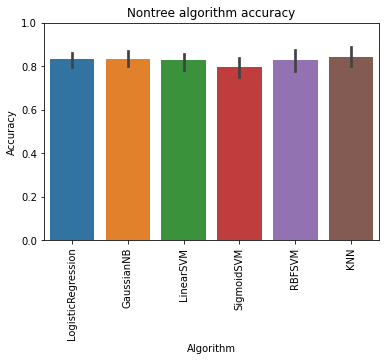

In [91]:
sns.barplot(data=non_tree_performance_df, x='Algorithm', y='Accuracy')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.title("Nontree algorithm accuracy")

# Tree-based algorithms

In [92]:
X_tree = heart_df_tree.drop(columns='HeartDisease')
y_tree = heart_df_tree['HeartDisease']

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
acc_dtree = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_tree.loc[train]
    y_train = y_tree.loc[train]
    
    X_validation = X_tree.loc[validation]
    y_validation = y_tree.loc[validation]
    
    clf = DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_dtree.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")

Fold: 0
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        82
           1       0.85      0.62      0.72       102

    accuracy                           0.73       184
   macro avg       0.75      0.74      0.73       184
weighted avg       0.76      0.73      0.73       184

Accuracy for fold 0: 0.7417503586800573
Fold: 1
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        82
           1       0.89      0.67      0.76       102

    accuracy                           0.77       184
   macro avg       0.79      0.78      0.77       184
weighted avg       0.80      0.77      0.77       184

Accuracy for fold 1: 0.7845528455284552
Fold: 2
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        82
           1       0.74      0.91      0.82       102

    accuracy                           0.78       184
   macro avg       0.80 

### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
acc_rfc = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_tree.loc[train]
    y_train = y_tree.loc[train]
    
    X_validation = X_tree.loc[validation]
    y_validation = y_tree.loc[validation]
    
    clf = RandomForestClassifier(n_estimators=200, criterion="entropy")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_rfc.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")

Fold: 0
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

Accuracy for fold 0: 0.8739837398373984
Fold: 1
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy for fold 1: 0.8531802965088474
Fold: 2
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83       184
   macro avg       0.88 

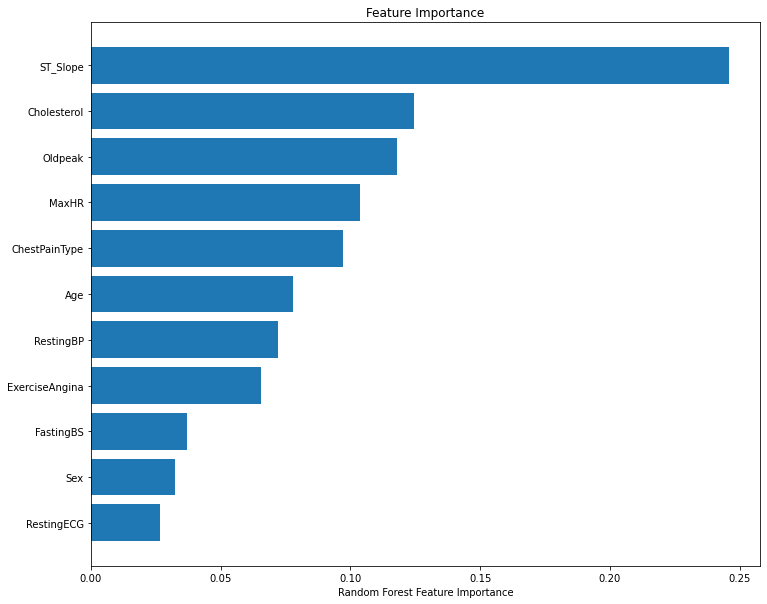

In [104]:
## Checking Feature importance 

plt.figure(figsize=(12,10))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[list(X_tree.columns)[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

### XGBoost

In [106]:
from xgboost import XGBClassifier

In [107]:
acc_xgb = []

strat_kf = model_selection.StratifiedKFold(n_splits=5)
for fold,(train,validation) in enumerate(strat_kf.split(X=X_nontree, y=y_nontree)):
    # for each fold get the indeces for train and validation
#     print(fold, train, validation)
    X_train = X_tree.loc[train]
    y_train = y_tree.loc[train]
    
    X_validation = X_tree.loc[validation]
    y_validation = y_tree.loc[validation]
    
    clf = XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    
    print(F"Fold: {fold}")
    print(classification_report(y_validation, y_pred))
    acc = roc_auc_score(y_validation, y_pred)
    acc_xgb.append(acc)
    print(F"Accuracy for fold {fold}: {acc}")

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 0
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        82
           1       0.93      0.76      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

Accuracy for fold 0: 0.845767575322812
[15:24:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

Fold: 4
              precision    recall  f1-score   support

           0       0.63      0.74      0.68        82
           1       0.76      0.64      0.70       101

    accuracy                           0.69       183
   macro avg       0.69      0.69      0.69       183
weighted avg       0.70      0.69      0.69       183

Accuracy for fold 4: 0.6937333977300169


## All method accuracy performance

Text(0.5, 1.0, 'Nontree algorithm accuracy')

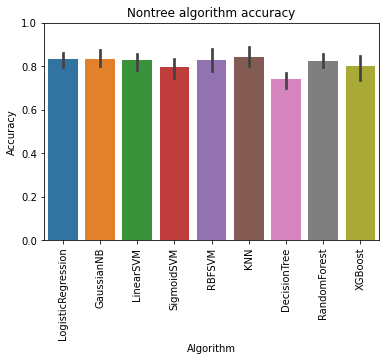

In [108]:
non_tree_performance_df = pd.DataFrame()
algorithm_accuracy_lists = [acc_log, acc_gaussnb, acc_svm_linear, acc_svm_sigmoid, acc_svm_rbf, acc_knn, acc_dtree, acc_rfc, acc_xgb]
algorithm_list = ['LogisticRegression', 'GaussianNB', 'LinearSVM', 'SigmoidSVM', 'RBFSVM', 'KNN', 'DecisionTree', 'RandomForest', 'XGBoost']
for acc_list, algorithm in zip(algorithm_accuracy_lists, algorithm_list):
    tmp_df = pd.DataFrame()
    tmp_df['Accuracy'] = acc_list
    tmp_df['Algorithm'] = algorithm
    non_tree_performance_df = non_tree_performance_df.append(tmp_df, ignore_index=True)

sns.barplot(data=non_tree_performance_df, x='Algorithm', y='Accuracy')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.title("Nontree algorithm accuracy")

# Choosing the best evaluation matrix

- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC):

If we calculate the area under the ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve
AUC is a widely used metric for skewed binary classification tasks in the industry,and a metric everyone should know about
- Log loss

Log Loss = - 1.0 ( target log(prediction) + (1 - target) * log(1 - prediction) )

Most of the metrics that we discussed until now can be converted to a multi-class version. The idea is quite simple. Let’s take precision and recall. We can calculate precision and recall for each class in a multi-class classification problem

- Macro averaged precision: calculate precision for all classes individually and then average them
- Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision
- Weighted precision: same as macro but in this case, it is weighted average depending on the number of items in each class

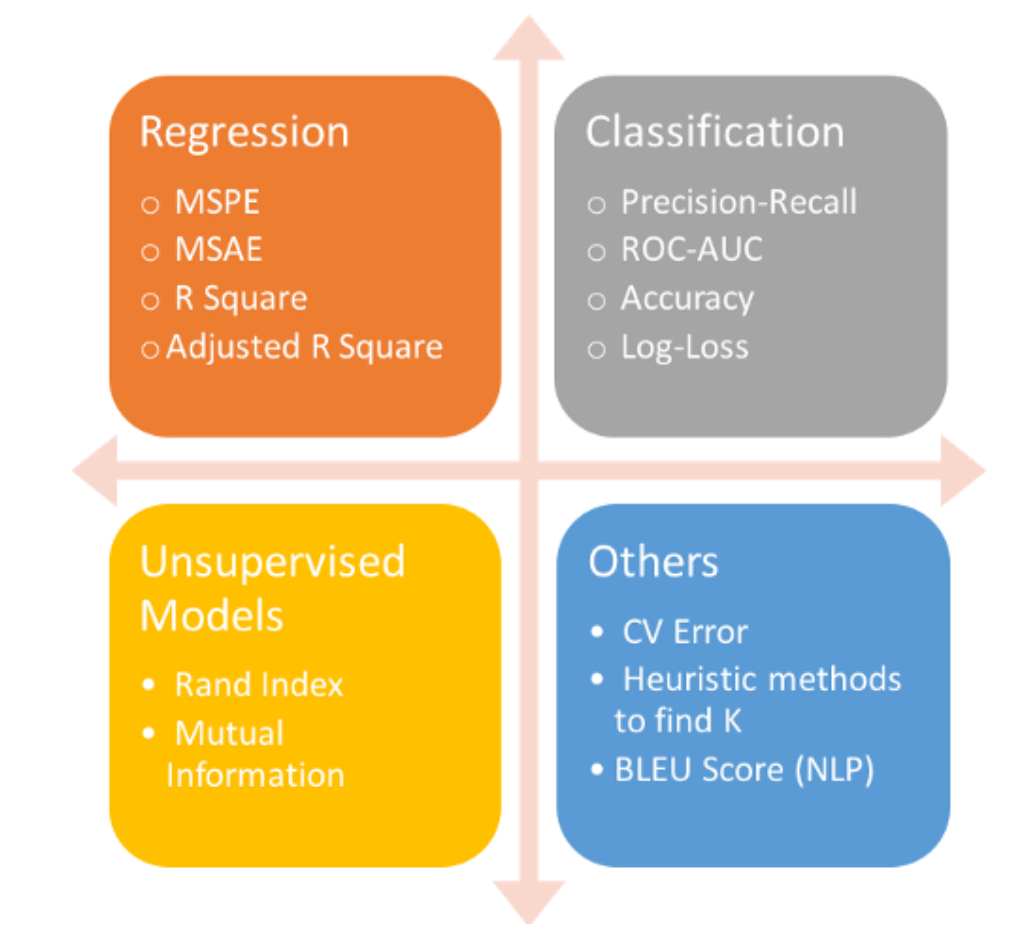
